## 載入所需的 Libraries

In [1]:
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from typing import List

---
## 載入資料

In [11]:
# read data from spam.csv
sms_data = pd.read_csv('spam.csv', encoding='latin-1') # UTF-8 無法處理檔案文字
sms_data = sms_data.loc[:, ['v1', 'v2']] # 清掉後面的 NaN
sms_data.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [13]:
# check how many spams and hams
sms_data.groupby('v1').count()

,v2
v1,
ham,4825
spam,747


In [3]:
# Answer

,content
label,
ham,4825
spam,747


In [28]:
# change label to from string to number
# "ham" --> 0, "spam" --> 1

sms_data['v1'] = sms_data['v1'].apply(lambda x: 0 if x=='ham' else 1)
sms_data.head()

,v1,v2
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


---
## 切分資料
* 將資料依據 label 比例切分為 training 與 testing data

In [135]:
ham = sms_data[sms_data.loc[:, 'v1'] == 0]
ham = ham.reset_index(drop=True)
ham_train = ham.loc[:len(ham)*0.8, :]
ham_test = ham.loc[len(ham)*0.8:, :]

spam = sms_data[sms_data.loc[:, 'v1'] == 1]
spam = spam.reset_index(drop=True)
spam_train = spam.loc[:len(spam)*0.8, :]
spam_test = spam.loc[len(spam)*0.8:, :]

In [136]:
len(ham_train)/len(ham), len(ham_test)/len(ham)

(0.8002072538860103, 0.2)

In [137]:
len(spam_train)/len(spam), len(spam_test)/len(spam)

(0.8005354752342704, 0.1994645247657296)

In [138]:
sms_train = ham_train.append(spam_train)
sms_test = ham_test.append(spam_test)

In [139]:
print(sms_train.groupby("v1").count())
print(sms_test.groupby("v1").count())

      v2
v1      
0   3861
1    598
     v2
v1     
0   965
1   149


###### 2021-01-16



---
## 資料預處理
* 將所有字詞轉為小寫
* 移除所有數字、標點符號

In [6]:
def preprocess(df: pd.DataFrame) -> pd.DataFrame:
    
    for i in range(len(df)):
        # make all content to lowercase
        ###<your code>###

        # remove all punctuations
        ###<your code>###
    
    return df

processed_train = preprocess(sms_train)
processed_test = preprocess(sms_test)

print("Train:")
print(processed_train.head())
print("Test:")
print(processed_test.head())

/Users/admin/Documents/cupoy/cupoy_env/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/Users/admin/Documents/cupoy/cupoy_env/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


Train:
  label                                            content
0     0  mmmmm it was sooooo good to wake to your words...
1     0                    how much did ur hdd casing cost
2     0  total disappointment when i texted you was the...
3     0  wen ur lovable bcums angry wid u dnt take it s...
4     0                    i will spoil you in bed as well
Test:
  label                                            content
0     0  i sent you the prices and do you mean the lt gt g
1     0   havent still waitin as usual come back sch oredi
2     0               why tired what special there you had
3     0  my painful personal thought i always try to ke...
4     0                            hurry home soup is done


In [7]:
# split data into x_train, y_train, x_test, y_test
y_train, x_train = zip(*processed_train.values)
y_test, x_test = zip(*processed_test.values)

# check numbers of unique word in the corpus
len(set(" ".join(list(x_train + x_test)).split()))

7708

### TF-IDF
可以發現種共有7708個字詞，這裡使用TF-IDF將來選取最高分的前2000個字詞
(若忘記的學員可參考先前TF-IDF課程章節或[此篇教學](https://ithelp.ithome.com.tw/articles/10228815?sc=iThelpR))

In [8]:
###<your code>###

print(f"Number of unique word: {len(vectorizer.vocabulary_)}")
(tfidf_train, tfidf_test)

Number of unique word: 2000


(<4457x2000 sparse matrix of type '<class 'numpy.float64'>'
 	with 50791 stored elements in Compressed Sparse Row format>,
 <1115x2000 sparse matrix of type '<class 'numpy.float64'>'
 	with 12689 stored elements in Compressed Sparse Row format>)

### 建立共現矩陣

In [9]:
def create_co_matrix(corpus: List[str], vocab_list: List[str], word2idx: dict,
                     window_size: int=1, use_weighting: bool=False, verbose: bool=False) -> np.ndarray:
    '''Function to create co-occurrence matrix
    '''
    #initialize co-occurrence matrix
    ###<your code>###
    
    for idx, sms in enumerate(corpus):
        ###<your code>###
        
        for center_i, center_word_id in enumerate(sms_ids):
            ###<your code>###
            
            for left_i, left_word_id in enumerate(context_ids):
                
                ###<your code>###
        
        if verbose:
            if idx != 0 and idx%500 == 0:
                    print(f"finishing {idx+1}/{len(corpus)}")
    print("Done")
    if use_weighting:
        # if use weighting, then we set the co-occurrence with the word itself to 1.0
        ###<your code>###
        
    return co_matrix

co_matrix = create_co_matrix(x_train, vectorizer.get_feature_names(), vectorizer.vocabulary_,
                            window_size=3, use_weighting=True, verbose=True)

co_matrix

finishing 501/4457
finishing 1001/4457
finishing 1501/4457
finishing 2001/4457
finishing 2501/4457
finishing 3001/4457
finishing 3501/4457
finishing 4001/4457
Done


array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

### 建立PPMI矩陣

In [10]:
#定義正向點間互資訊

def ppmi(co_matrix: np.ndarray, eps: float=1e-8, verbose: bool=False):
    ###<your code>###
    
    for i in range(co_matrix.shape[0]):
        for j in range(co_matrix.shape[1]):
            ###<your code>###
            
            if verbose:
                cnt += 1
                if cnt % 10 == 0 or cnt == total:
                    print(f"{cnt}/{total} Done")
    
    return M

ppmi_matrix = ppmi(co_matrix, verbose=False)
ppmi_matrix

/Users/admin/Documents/cupoy/cupoy_env/lib/python3.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in log2
  del sys.path[0]


array([[13.601798 ,  0.       ,  0.       , ...,  0.       ,  0.       ,
         0.       ],
       [ 0.       , 12.637939 ,  0.       , ...,  0.       ,  0.       ,
         0.       ],
       [ 0.       ,  0.       ,  3.8175101, ...,  0.       ,  0.       ,
         0.       ],
       ...,
       [ 0.       ,  0.       ,  0.       , ...,  9.8432665,  0.       ,
         0.       ],
       [ 0.       ,  0.       ,  0.       , ...,  0.       ,  4.743008 ,
         0.       ],
       [ 0.       ,  0.       ,  0.       , ...,  0.       ,  0.       ,
         6.7493014]], dtype=float32)

### 使用SVD降維
利用sklearn中的TruncatedSVD對co-occurrence matrix進行降維，並利用variance來找出最適合的維度
[參考文獻](https://medium.com/swlh/truncated-singular-value-decomposition-svd-using-amazon-food-reviews-891d97af5d8d)

(讀者可以嘗試使用SVD對PPMI進行降維)

Number of components = 10 and explained variance = 0.8642725587999802
Number of components = 20 and explained variance = 0.8980414674614533
Number of components = 30 and explained variance = 0.9156628006889777
Number of components = 40 and explained variance = 0.927689024601538
Number of components = 50 and explained variance = 0.936793376016642
Number of components = 60 and explained variance = 0.9440622100583419
Number of components = 70 and explained variance = 0.9497335259111686
Number of components = 80 and explained variance = 0.9545927350412019
Number of components = 90 and explained variance = 0.9586825009775746
Number of components = 100 and explained variance = 0.9622576661554756
Number of components = 110 and explained variance = 0.9653164683546815
Number of components = 120 and explained variance = 0.9680388058100005
Number of components = 130 and explained variance = 0.9704123451115438
Number of components = 140 and explained variance = 0.9725534055673797


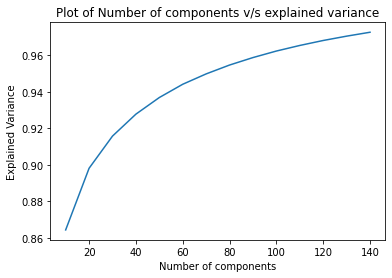

In [11]:
# Program to find the optimal number of components for Truncated SVD
n_comp = range(10,150,10) # list containing different values of components
variance_sum = [] # explained variance ratio for each component of Truncated SVD

for dim in n_comp:
    ###<your code>###
    
plt.plot(n_comp, variance_sum)
plt.xlabel('Number of components')
plt.ylabel("Explained Variance")
plt.title("Plot of Number of components v/s explained variance")
plt.show()

In [12]:
# choose 140 as final dimension to reduce to 
# 利用上述找到的最適合dimension來對co-occurrence matrix進行降維
###<your code>###

### 使用KNN模型進行分類
在進行分類之前，先利用簡單的詞向量平均來計算文本向量

[參考文獻](https://medium.com/ai-academy-taiwan/nlp-%E4%B8%8D%E5%90%8C%E8%A9%9E%E5%90%91%E9%87%8F%E5%9C%A8%E6%96%87%E6%9C%AC%E5%88%86%E9%A1%9E%E4%B8%8A%E7%9A%84%E8%A1%A8%E7%8F%BE%E8%88%87%E5%AF%A6%E4%BD%9C-e72a2daecfc)

In [120]:
# get doc vector via take mean of all word vectors inside the corresponding document

def make_doc_vectors(corpus: List[str], word2idx: dict, vocab_list: List) -> List[np.ndarray]:
    
    # vectorizing data 
    # and make document vector by take mean to all word vecto
    doc_vec = []
    empty_doc_list = []
    for i, sms_msg in enumerate(corpus):
        sms_msg = [word2idx[word] for word in sms_msg.split() if word in vocab_list] #tokenize
        if len(sms_msg) > 0:
            sms_msg = np.array([re_co_matrix[ids] for ids in sms_msg]) #vectorize
            doc_vec.append(sms_msg.mean(axis=0))
        else:
            empty_doc_list.append(i)
            print(f"document {i} doesn't contain word in vocab_list")
            print(corpus[i])
            print("\n")
        
    return np.vstack(doc_vec), empty_doc_list

word2idx = vectorizer.vocabulary_
vocab_list = vectorizer.get_feature_names()

doc_vec_train, missing_train_list = make_doc_vectors(x_train, word2idx, vocab_list)
print("="*50)
doc_vec_test, missing_test_list = make_doc_vectors(x_test, word2idx, vocab_list)

document 422 doesn't contain word in vocab_list
erutupalam thandiyachu


document 499 doesn't contain word in vocab_list
g w r


document 890 doesn't contain word in vocab_list
beerage


document 942 doesn't contain word in vocab_list
ultimately tor motive tui achieve korli


document 1486 doesn't contain word in vocab_list
raviyog peripherals bhayandar east


document 2105 doesn't contain word in vocab_list
u


document 2260 doesn't contain word in vocab_list
gibbs unsold mike hussey


document 2282 doesn't contain word in vocab_list



document 2536 doesn't contain word in vocab_list
received understood n acted upon


document 3567 doesn't contain word in vocab_list
garbage bags eggs jam bread hannaford wheat chex


document 3583 doesn't contain word in vocab_list
tf p


document 76 doesn't contain word in vocab_list



document 322 doesn't contain word in vocab_list
east coast


document 360 doesn't contain word in vocab_list
ringtoneking


document 809 doesn't contain word in vocab

In [134]:
from sklearn.neighbors import KNeighborsClassifier

# training
y_train_filter = np.delete(np.array(y_train), missing_train_list)

###<your code>###

# testing
y_test_filter = np.delete(np.array(y_test), missing_test_list)
###<your code>###

In [135]:
print(f"train acc: {np.sum(train_pred == y_train_filter) / len(y_train_filter)}")
print(f"train acc: {np.sum(test_pred == y_test_filter) / len(y_test_filter)}")

train acc: 0.9768331084120557
train acc: 0.9521660649819494
